# Tikz Figures

In [1]:
%load_ext jupyter_tikz

# Pyplot figures

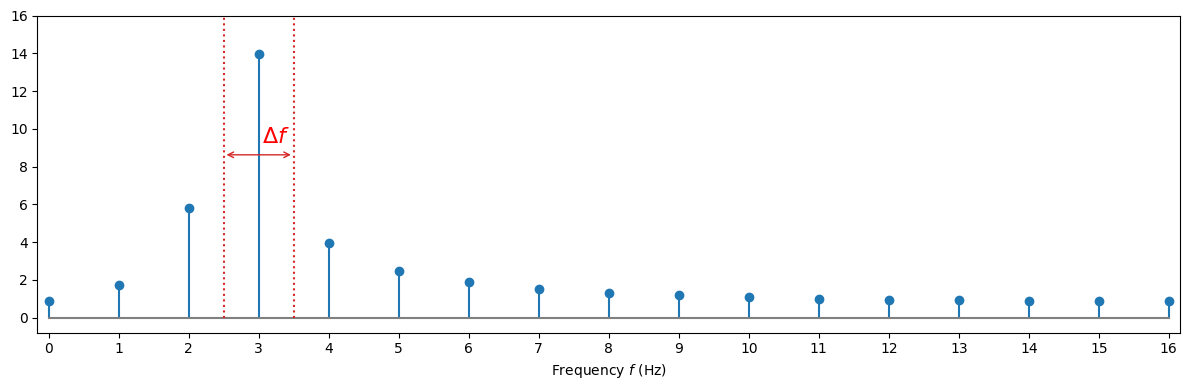

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 32
n = np.arange(N)
fs = 200

w0 = np.pi/6

x = np.cos(w0*n)

X = np.fft.rfft(x)

plt.close(1); plt.figure(1, figsize=(12,4))
plt.stem(np.abs(X), basefmt="grey")
plt.gca().set_xmargin(0.01)

# Coordinates for the arrow
x_center = 3
C = 2/(1+np.sqrt(5))
x_left = x_center - 0.5
x_right = x_center + 0.5
y = np.abs(X[x_center])*C

# Add a double-headed arrow
plt.annotate(
    '', 
    xy=(x_right, y), 
    xytext=(x_left, y),
    arrowprops=dict(arrowstyle='<->', color='C3')
)

# Optionally, add a label above the arrow
plt.text(x_center*1.08, y*1.05, "$\\Delta f$", ha='center', va='bottom', color='red', fontsize=16)
plt.vlines([2.5, 3.5], ymin=0, ymax=16, color='C3', linestyle=':')
plt.xticks(np.arange(N//2+1))
plt.ylim(ymax=16)
plt.xlabel("Frequency $f$ (Hz)")
plt.tight_layout()
plt.savefig("frequency_bin.svg")

C:\Users\kaier\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:1477: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


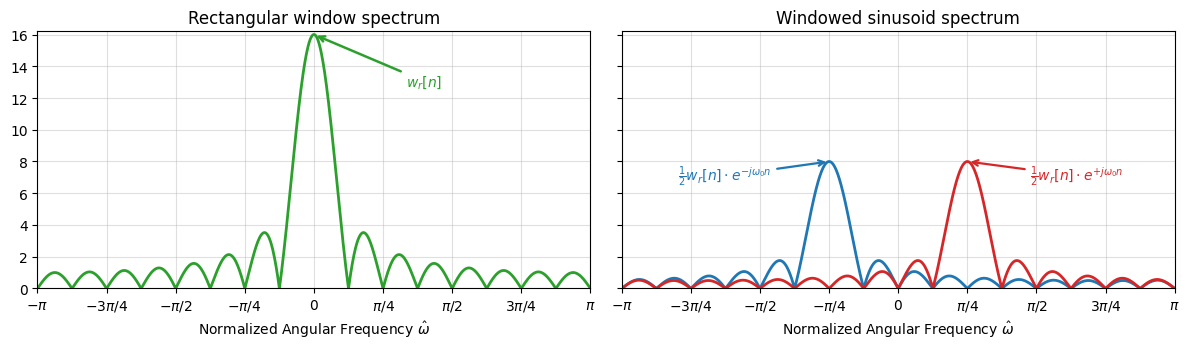

In [21]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# ----- params -----
N = 16                       # window length (peak ≈ N like in the left plot)
w0 = np.pi/4                 # sinusoid frequency for the right plot
w = np.linspace(-np.pi, np.pi, 1024+1, endpoint=True)  # digital frequency axis
n = np.arange(N)

wr = np.ones(N)
_, Wr = sig.freqz(np.ones(N),worN = w, whole=True)
Wr_mag = np.abs(Wr)

_, Wr_pos = sig.freqz(np.exp(1j*w0*n)*0.5, worN = w, whole=True)

_, Wr_neg = sig.freqz(np.exp(-1j*w0*n)*0.5, worN = w, whole=True)




# ----- plotting -----
fig, axs = plt.subplots(1, 2, figsize=(12, 3.6), sharey=True)

# x-ticks at multiples of π/4
xticks = np.linspace(-np.pi, np.pi, 9)
xticklabels = [r'$- \pi$', r'$-3\pi/4$', r'$- \pi/2$', r'$- \pi/4$',
               r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$']

# Left: |Wr(ω)|
ax = axs[0]
ax.plot(w, Wr_mag, linewidth=2, color='C2')
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0, N)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.grid(True, alpha=0.4)
ax.set_xlabel('Normalized Angular Frequency $\\hat{\\omega}$')
ax.set_title('Rectangular window spectrum')
# annotate main lobe
peak_x = 0.0
peak_y = N
ax.annotate(r'$w_r[n]$',
            xy=(peak_x, peak_y),
            xytext=(np.pi/3, N*0.8),
            arrowprops=dict(arrowstyle='->', lw=1.8, color='C2'), color='C2')

# Right: windowed sinusoid => two shifted, scaled lobes
ax = axs[1]
ax.plot(w, np.abs(Wr_neg), linewidth=2, color='C0')  # centered at -w0
ax.plot(w, np.abs(Wr_pos), linewidth=2, color='C3')  # centered at +w0
#ax.plot(w, np.abs(Wr_pos + Wr_neg), linewidth=1.2, color='C4', linestyle='-')  # centered at +w0
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0, N+.2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.grid(True, alpha=0.4)
ax.set_xlabel('Normalized Angular Frequency $\\hat{\\omega}$')
ax.set_title('Windowed sinusoid spectrum')

# annotate the two shifted copies
# near -w0
ax.annotate(r'$\frac{1}{2} w_r[n]\cdot e^{-j\omega_0 n}$',
            xy=(-w0, Wr_neg[np.argmin(np.abs(w + w0))]),
            xytext=(-2.5, N/2*0.85),
            arrowprops=dict(arrowstyle='->', lw=1.6, color='C0'), color='C0')
# near +w0
ax.annotate(r'$\frac{1}{2} w_r[n]\cdot e^{+j\omega_0 n}$',
            xy=(+w0, Wr_pos[np.argmin(np.abs(w - w0))]),
            xytext=(+1.5, N/2*0.85),
            arrowprops=dict(arrowstyle='->', lw=1.6, color='C3'), color='C3')

plt.tight_layout()
plt.savefig("window_modulation.svg")

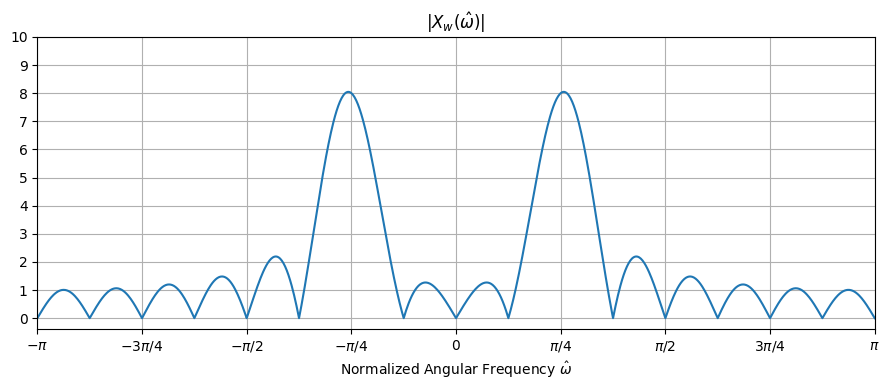

In [25]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# ----- params -----
N = 16                       # window length (peak ≈ N like in the left plot)
w0 = np.pi/4                 # sinusoid frequency for the right plot
w = np.linspace(-np.pi, np.pi, 1024+1, endpoint=True)  # digital frequency axis
n = np.arange(N)

Xm = np.fft.fftshift(np.fft.fft(np.cos(w0*n)))
fm = np.fft.fftshift(np.fft.fftfreq(N))*2*np.pi

wr = np.ones(N)
_, Wr = sig.freqz(np.cos(w0*n),worN = w, whole=True)
Wr_mag = np.abs(Wr)

plt.figure(figsize=(9,4))
plt.plot(w, Wr_mag)
# x-ticks at multiples of π/4
xticks = np.linspace(-np.pi, np.pi, 9)
xticklabels = [r'$- \pi$', r'$-3\pi/4$', r'$- \pi/2$', r'$- \pi/4$',
               r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$']

plt.xticks(xticks, xticklabels)
plt.gca().set_xmargin(0)
plt.grid(True)
plt.ylim(ymax=10)
plt.yticks(np.arange(11));
plt.title("$|X_w\\left(\\hat{\\omega} \\right)|$")
plt.xlabel("Normalized Angular Frequency $\\hat{\\omega}$")
plt.tight_layout()
plt.savefig("sinusoid_rect_spectrum.svg")

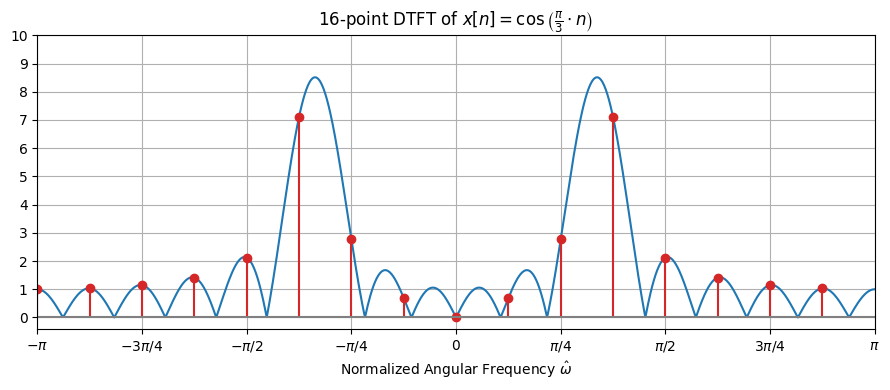

In [41]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# ----- params -----
N = 16                       # window length (peak ≈ N like in the left plot)
w0 = np.pi/3                 # sinusoid frequency for the right plot
w = np.linspace(-np.pi, np.pi, 1024+1, endpoint=True)  # digital frequency axis
n = np.arange(N)

Xm = np.fft.fftshift(np.fft.fft(np.cos(w0*n)))
fm = np.fft.fftshift(np.fft.fftfreq(N))*2*np.pi

wr = np.ones(N)
_, Wr = sig.freqz(np.cos(w0*n),worN = w, whole=True)
Wr_mag = np.abs(Wr)

plt.figure(figsize=(9,4))
plt.plot(w, Wr_mag)
# x-ticks at multiples of π/4
xticks = np.linspace(-np.pi, np.pi, 9)
xticklabels = [r'$- \pi$', r'$-3\pi/4$', r'$- \pi/2$', r'$- \pi/4$',
               r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$']

plt.xticks(xticks, xticklabels)
plt.gca().set_xmargin(0)
plt.grid(True)
plt.ylim(ymax=10)
plt.yticks(np.arange(11));
plt.title("16-point DTFT of $x[n] = \\cos\\left( \\frac{\\pi}{3} \\cdot n \\right)$")
plt.xlabel("Normalized Angular Frequency $\\hat{\\omega}$")
plt.tight_layout()
marker, line, base = plt.stem(fm, np.abs(Xm), markerfmt="C3", linefmt="C3", basefmt="grey")
base.set_xdata([-np.pi, np.pi])
plt.savefig("sinusoid_spectral_leakage.svg")

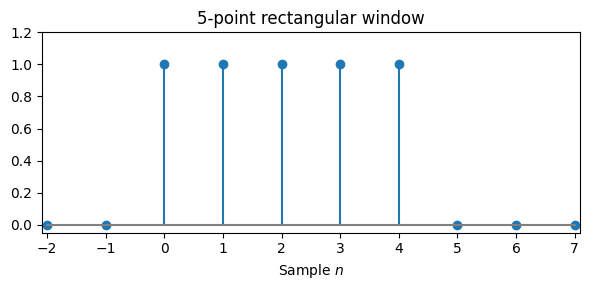

In [5]:
n = np.arange(-2, 8)
wr = (0<=n)*(n<5)*1

plt.figure(figsize=(6, 3))
plt.stem(n, wr, basefmt="grey")
plt.xlabel("Sample $n$")
plt.xticks(n)
plt.ylim(ymax=1.2)
plt.gca().set_xmargin(0.01)
plt.title("5-point rectangular window")
plt.tight_layout()
plt.savefig("w_rect_5pt.svg")

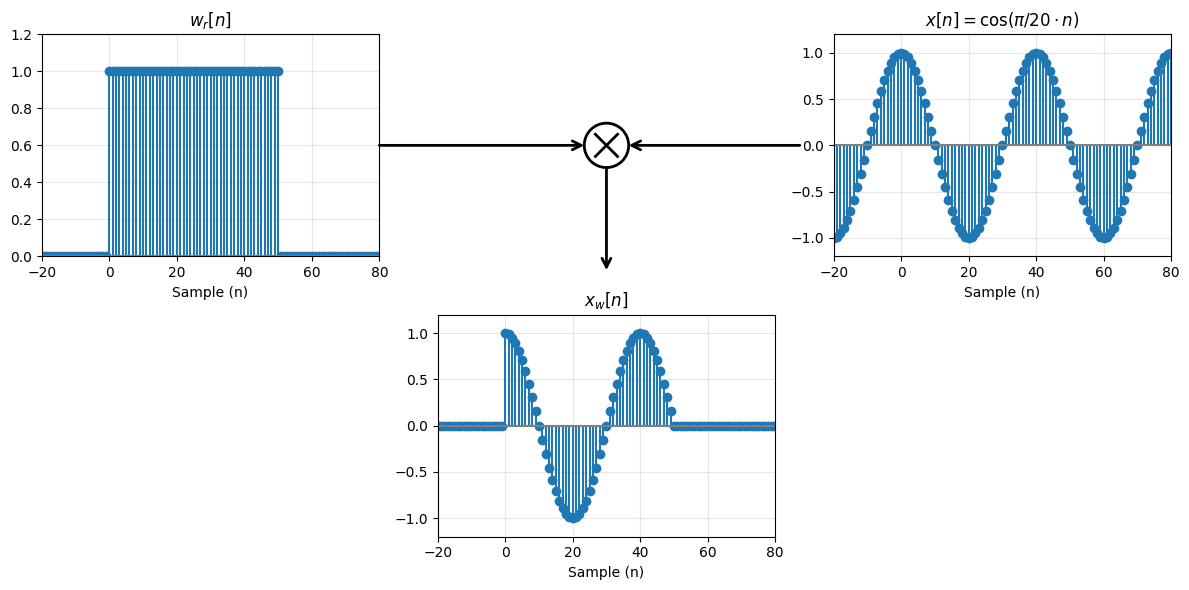

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch, Circle

# ----- signals -----
n = np.arange(-20, 81)
L = 50
wr = ((n >= 0) & (n <= L)).astype(float)
x = np.cos(np.pi/20 * n)
xw = wr * x

# ----- layout -----
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 3, height_ratios=[1, 1])

ax_w   = fig.add_subplot(gs[0, 0])   # top-left: window
ax_mul = fig.add_subplot(gs[0, 1])   # top-middle: multiplication node
ax_x   = fig.add_subplot(gs[0, 2])   # top-right: cosine
ax_xw  = fig.add_subplot(gs[1, 1])   # bottom-center: product

# ----- plots -----
ax_w.stem(n, wr, basefmt='grey')
ax_w.set_xlim(-20, 80); ax_w.set_ylim(0, 1.2)
ax_w.set_xlabel('Sample (n)'); ax_w.set_title(r'$w_r[n]$'); ax_w.grid(True, alpha=0.3)

ax_x.stem(n, x, basefmt='grey')
ax_x.set_xlim(-20, 80); ax_x.set_ylim(-1.2, 1.2)
ax_x.set_xlabel('Sample (n)'); ax_x.set_title(r'$x[n]=\cos(\pi/20\cdot n)$'); ax_x.grid(True, alpha=0.3)

ax_xw.stem(n, xw, basefmt='grey')
ax_xw.set_xlim(-20, 80); ax_xw.set_ylim(-1.2, 1.2)
ax_xw.set_xlabel('Sample (n)'); ax_xw.set_title(r'$x_w[n]$'); ax_xw.grid(True, alpha=0.3)

# ----- multiplication node (circle with X) -----
ax_mul.set_axis_off()
ax_mul.set_aspect('equal')
ax_mul.set_xlim(0, 1); ax_mul.set_ylim(0, 1)
# circle
ax_mul.add_patch(Circle((0.5, 0.5), 0.10, fill=False, lw=2))
# "X"
ax_mul.plot([0.45, 0.55], [0.45, 0.55], lw=2, color='k')
ax_mul.plot([0.45, 0.55], [0.55, 0.45], lw=2, color='k')

# ----- arrows to/from node -----
arrow_kw = dict(arrowstyle='->', lw=2, mutation_scale=16)

# left plot -> node
fig.add_artist(ConnectionPatch(xyA=(1, 0.5), coordsA=ax_w.transAxes,
                               xyB=(0.40, 0.5), coordsB=ax_mul.transAxes, **arrow_kw))
# right plot -> node
fig.add_artist(ConnectionPatch(xyA=(-0.10, 0.5), coordsA=ax_x.transAxes,
                               xyB=(0.60, 0.5), coordsB=ax_mul.transAxes, **arrow_kw))
# node -> bottom plot
fig.add_artist(ConnectionPatch(xyA=(0.5, 0.40), coordsA=ax_mul.transAxes,
                               xyB=(0.5, 1.2), coordsB=ax_xw.transAxes, **arrow_kw))

plt.tight_layout()
plt.savefig("window_multiplication.svg")